#### Import Dependencies

In [1]:
import random
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Install and import the citipy package. This package will output the nearest city to a specific pair of geographical
# coordinates. It is very important for this project.
import sys
!{sys.executable} -m pip install citipy
from citipy import citipy

#### Save config information.

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = "febde43dfe4affe5e81fe677f8e0a7e3"

#### Generate 500 cities for data analysis

In [3]:
# Latitude limits for the analysis are the full -90 degrees and 90 degrees.
# Longitude limits are -180 degrees and 180 degrees.
lat_min = -90
lat_max = 90

long_min = -180
long_max = 180

# Set a counter and create an empty list for holding the city and country
# information
counter = 0
cities = []
countries = []

#Generate pseudo-random latitude and longitude coordinates
while counter < 560:
    lat = random.uniform(lat_min, lat_max)
    long = random.uniform(long_min, long_max)

#Pick the nearest city to those latitude and longitude values
    loc = citipy.nearest_city(lat, long)
    city = loc.city_name
    country = loc.country_code
    if city: 
        if city not in cities:
            cities.append(city)
            countries.append(country)
            counter = counter + 1
        else:
            pass

#### Perform a query to OpenWeatherMap site for each city

In [4]:
# What I want is to run a loop for 500 individual cities, where for each
# city I pull the weather data and then move on to the next city. Unfortunately
# the Citipy database is more extensive than OpenWeatherMap, so I end up with 
# fewer than 500 cities in my weather data if I simply perform 500 queries. To
# to offset and reconcile this, I selected more than 500 cities from the CitiPy
# app and then performed queries on each of them, resulting in CLOSE TO 500 net
# data points.

#The following code is adapted from the exercise Ins_OpenWeatherDataFrame:

In [5]:
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [6]:
# Set up lists to hold reponse info

city_name = []
lat = []
maxtemp = []
humid = []
cloud = []
wind_spd = []

counter = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        print(f"checking {city} (city number {counter}) at url {query_url + city}")
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        maxtemp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_spd.append(response['wind']['speed'])
        counter = counter + 1
    except:
        print("City not found")
        pass

checking bredasdorp (city number 0) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=bredasdorp
checking hobart (city number 1) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=hobart
checking new norfolk (city number 2) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=new norfolk
checking albany (city number 3) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=albany
checking palmer (city number 4) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=palmer
checking klaksvik (city number 5) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=klaksvik
checking regeneracao (city number 6) at url http://api.openweathermap.org/data/2.5/weather?appid

checking bubaque (city number 51) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=bubaque
checking dikson (city number 52) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=dikson
checking barawe (city number 53) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=barawe
City not found
checking khatanga (city number 53) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=khatanga
checking necochea (city number 54) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=necochea
checking yellowknife (city number 55) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=yellowknife
checking kapaa (city number 56) at url http://api.openweathermap.org/data/2.5

checking kokoda (city number 95) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kokoda
checking ahipara (city number 96) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=ahipara
checking jamestown (city number 97) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=jamestown
checking illoqqortoormiut (city number 98) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=illoqqortoormiut
City not found
checking vadlapudi (city number 98) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=vadlapudi
checking saint-leu (city number 99) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=saint-leu
checking bonavista (city number 100) at url http://api.op

checking egvekinot (city number 143) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=egvekinot
checking bluff (city number 144) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=bluff
checking pravokumskoye (city number 145) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=pravokumskoye
checking marsa matruh (city number 146) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=marsa matruh
checking wattegama (city number 147) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=wattegama
checking valparaiso (city number 148) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=valparaiso
checking saint-pierre (city number 149) at url http://api.open

checking andenes (city number 193) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=andenes
City not found
checking west bay (city number 193) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=west bay
checking yar-sale (city number 194) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=yar-sale
checking antalaha (city number 195) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=antalaha
checking grand-lahou (city number 196) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=grand-lahou
checking si bun ruang (city number 197) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=si bun ruang
checking mount isa (city number 198) at url http://api.

checking miri (city number 244) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=miri
checking grand gaube (city number 245) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=grand gaube
checking grindavik (city number 246) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=grindavik
checking katha (city number 247) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=katha
City not found
checking darab (city number 247) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=darab
checking ferrol (city number 248) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=ferrol
checking caravelas (city number 249) at url http://api.openweathermap.org/data/2.5/

City not found
checking paso de patria (city number 291) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=paso de patria
checking aneho (city number 292) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=aneho
checking malpe (city number 293) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=malpe
checking khani (city number 294) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=khani
checking broome (city number 295) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=broome
checking tuban (city number 296) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=tuban
checking lorengau (city number 297) at url http://api.openweathermap.org/data/2.5/w

checking mporokoso (city number 338) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=mporokoso
checking bela (city number 339) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=bela
checking altay (city number 340) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=altay
checking fortuna (city number 341) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=fortuna
checking novopavlovka (city number 342) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=novopavlovka
checking san miguel (city number 343) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=san miguel
checking oxford (city number 344) at url http://api.openweathermap.org/data/2.5/weat

checking cabo san lucas (city number 385) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=cabo san lucas
checking belaya gora (city number 386) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=belaya gora
checking kaduna (city number 387) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=kaduna
checking rehli (city number 388) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=rehli
checking codrington (city number 389) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=codrington
checking paradwip (city number 390) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=paradwip
City not found
checking tupik (city number 390) at url http://api.open

checking west fargo (city number 436) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=west fargo
checking dracena (city number 437) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=dracena
checking bellefontaine (city number 438) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=bellefontaine
checking linjiang (city number 439) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=linjiang
checking mayumba (city number 440) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=mayumba
checking nioro (city number 441) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=nioro
checking revda (city number 442) at url http://api.openweathermap.org/data/2.5

checking stornoway (city number 487) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=stornoway
City not found
checking abu kamal (city number 487) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=abu kamal
checking sayyan (city number 488) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=sayyan
checking ostersund (city number 489) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=ostersund
checking revin (city number 490) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=revin
checking khingansk (city number 491) at url http://api.openweathermap.org/data/2.5/weather?appid=febde43dfe4affe5e81fe677f8e0a7e3&units=metric&q=khingansk
checking nome (city number 492) at url http://api.openweathermap.org/

#### Create and save a data frame with the query response data

In [7]:
# Use a dictionary to create a Pandas DataFrame with the data
weather_dict = {
    "City": city_name,
    "Latitude": lat,
    "Max Temperature": maxtemp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind_spd
}
weather_data = pd.DataFrame(weather_dict)

# Translate temperature in Celsius to Fahrenheit
weather_data["Max Temperature"] = weather_data["Max Temperature"]*1.8 + 32

# Create the CSV and display the dataframe
weather_data.to_csv('output/Weather_data.csv')
weather_data.head()

,City,Latitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,-34.53,69.800,88,76,4.1
1,Hobart,-42.88,53.600,87,40,2.1
2,New Norfolk,-42.78,53.600,87,40,2.1
3,Albany,42.65,41.000,25,40,6.2
4,Palmer,-34.85,64.994,67,0,0.5


#### Build four scatter plots, one for each type of data versus latitude

#### Temperature versus latitude plot

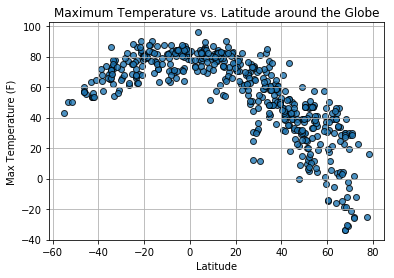

In [8]:
# Build the scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], marker="o", edgecolor="black", linewidths=1, 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Maximum Temperature vs. Latitude around the Globe")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/MaxTemp_vs_Latitude.png")

# Show plot
plt.show()

#### Humidity versus latitude plot

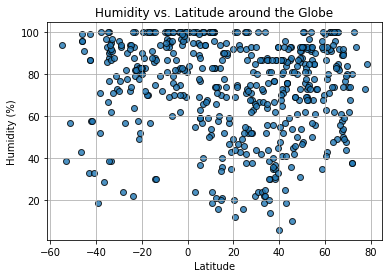

In [9]:
# Build the scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o", edgecolor="black", linewidths=1, 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude around the Globe")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Cloudiness versus latitude plot

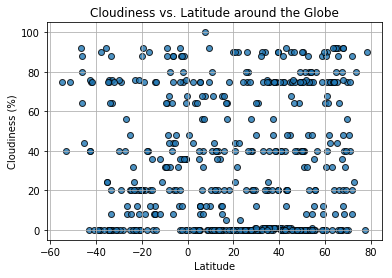

In [10]:
# Build the scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", edgecolor="black", linewidths=1, 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude around the Globe")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Wind speed versus latitude plot

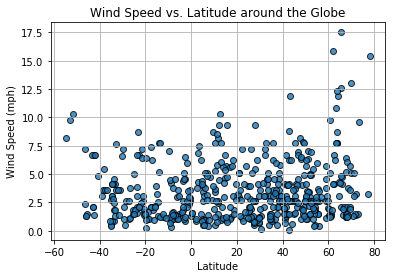

In [11]:
# Build the scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", edgecolor="black", linewidths=1, 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Wind Speed vs. Latitude around the Globe")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

#### Three Conclusions

##### 1. Clearly, temperature goes up as you get closer to the equator. The temperature data bends in an arc, from 30 degrees Fahrenheit at -60 degrees latitude to 85 degrees at the equator to 30 degrees at 80 degrees latitude.

###### 2. Wind Speed and Humidity appear normally distributed, with a low wind speed and a high humidity being the consistent realities for this data set. The global humidity seems to have a median of around 85%, and wind speed seems to be a median of around 1.5-2.5%.

##### 3. Simply looking at cloudiness versus latitude does not tell us much more than that it appears random: cloudiness may have a relationship with other data (like if it is a coastal or non-coastal city, etc.) but there does not seem to be a relationship with latitude.